## **Titan Bagus Bramantyo**
Data Scientist Virtual Intership Experience at ID/X Partners Batch Agustus 2022
___

### **1. Import library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **2. Load Dataset**

In [2]:
df = pd.read_csv("dataset/loan_data_2007_2014.csv")
df.head()

c:\Users\PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df.shape

(445273, 10)

### **3. Data Understanding**

In [3]:
desc = pd.read_excel('LCDataDictionary.xlsx')
desc

,Unnamed: 0,Description,Unnamed: 2
0,addr_state,The state provided by the borrower in the loan...,Negara yang disediakan oleh peminjam dalam apl...
1,annual_inc,The self-reported annual income provided by th...,Penghasilan tahunan yang dilaporkan sendiri ya...
2,annual_inc_joint,The combined self-reported annual income provi...,Penghasilan tahunan yang dilaporkan sendiri ga...
3,application_type,Indicates whether the loan is an individual ap...,Menunjukkan apakah pinjaman adalah aplikasi in...
4,collection_recovery_fee,post charge off collection fee,Biaya pengumpulan biaya penagihan
...,...,...,...
75,acc_now_delinq,The number of accounts on which the borrower i...,Jumlah akun di mana peminjam sekarang nakal.
76,tot_coll_amt,Total collection amounts ever owed,Total jumlah pengumpulan yang pernah ada
77,tot_cur_bal,Total current balance of all accounts,Total Saldo Saat Ini dari Semua Akun
78,NaN,NaN,NaN


### **4. Data Preprocessing**

In [4]:
# Checking for column that has missing value in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

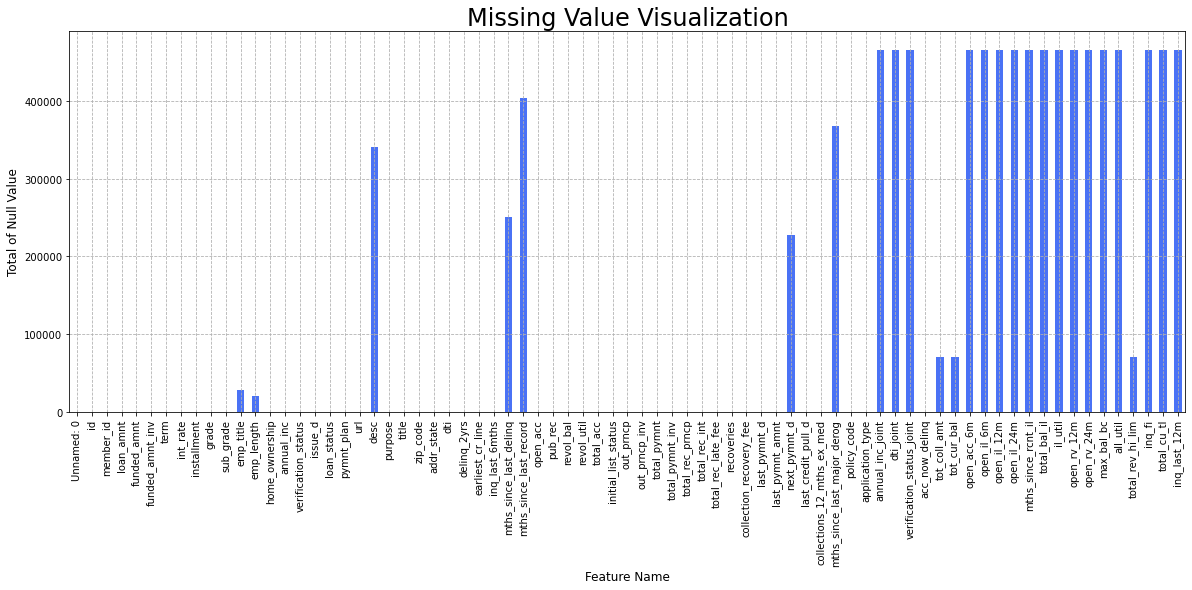

In [5]:
# checking null value in column using visualization

def null_value(df, rot=90, figsize=(20, 7), color="#4a72f5"):
    ax = (df.isnull().sum()).plot(kind='bar', figsize=figsize, color=color, rot=rot)
    plt.grid(True, linestyle='--')
    ax.set_xlabel("Feature Name", fontsize=12)
    ax.set_ylabel("Total of Null Value", fontsize=12)
    ax.set_title('Missing Value Visualization', fontsize=24)
    plt.show()
    
null_value(df)

In [6]:
# rename selected features/columns name
df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount",\
                        "funded_amnt_inv": "investor_funds", "last_pymnt_amnt":"last_pymnt_amount",
                        "int_rate": "interest_rate", "annual_inc": "annual_income"})

# selected features/columns
col = ['loan_amount','funded_amount','emp_length','home_ownership','interest_rate','annual_income','last_pymnt_amount','total_pymnt','loan_status','dti']

# create new dataframe with selected columns
ori_df = df.copy()
df = df[col]
df

,loan_amount,funded_amount,emp_length,home_ownership,interest_rate,annual_income,last_pymnt_amount,total_pymnt,loan_status,dti
0,5000,5000,10+ years,RENT,10.65,24000.0,171.62,5861.071414,Fully Paid,27.65
1,2500,2500,< 1 year,RENT,15.27,30000.0,119.66,1008.710000,Charged Off,1.00
2,2400,2400,10+ years,RENT,15.96,12252.0,649.91,3003.653644,Fully Paid,8.72
3,10000,10000,10+ years,RENT,13.49,49200.0,357.48,12226.302210,Fully Paid,20.00
4,3000,3000,1 year,RENT,12.69,80000.0,67.79,3242.170000,Current,17.94
...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,4 years,MORTGAGE,14.47,110000.0,432.64,10383.360000,Current,19.85
466281,22000,22000,10+ years,MORTGAGE,19.97,78000.0,17.50,4677.920000,Charged Off,18.45
466282,20700,20700,7 years,MORTGAGE,16.99,46000.0,514.34,12343.980000,Current,25.65
466283,2000,2000,3 years,OWN,7.90,83000.0,1500.68,2126.579838,Fully Paid,5.39


In [7]:
# preview dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loan_amount        466285 non-null  int64  
 1   funded_amount      466285 non-null  int64  
 2   emp_length         445277 non-null  object 
 3   home_ownership     466285 non-null  object 
 4   interest_rate      466285 non-null  float64
 5   annual_income      466281 non-null  float64
 6   last_pymnt_amount  466285 non-null  float64
 7   total_pymnt        466285 non-null  float64
 8   loan_status        466285 non-null  object 
 9   dti                466285 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 35.6+ MB


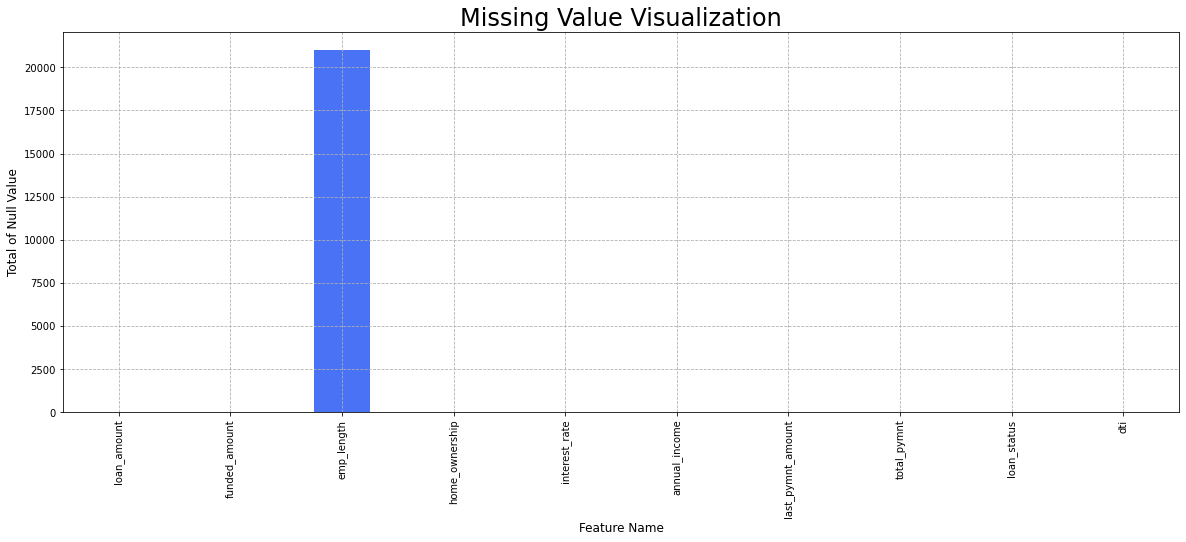

In [8]:
# re-check null value in column using visualization
null_value(df)

In [9]:
# check the percentage between missing value and total data in 'emp_length'
propo = df['emp_length'].isnull().sum()/df.shape[0]

print("'emp_length' missing value percentage to total data :", propo)


'emp_length' missing value percentage to total data : 0.04505399058515715


<b>missing value in 'emp_length'</b> percentage towards total data <b>is not too significant</b>, so I decide to drop <br>
the rows that contain missing value.

In [10]:
df = df.dropna(how='any')
df.shape

(445273, 10)

### **5. Dictionary of New Dataframe**

<ol>
    <li><b>loan_amount</b> : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</li>
    <li><b>funded_amount</b> : The total amount committed to that loan at that point in time.</li>
    <li><b>emp_length</b> : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</li>
    <li><b>home_ownership</b> : The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.</li>
    <li><b>annual_income</b> : The self-reported annual income provided by the borrower during registration.</li>
    <li><b>last_pymnt_amount</b> : Last total payment amount received.</li>
    <li><b>total_pymnt</b> : Payments received to date for total amount funded.</li>
    <li><b>dti</b> : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</li>
    <li><b>loan_status</b> : Current status of the loan.</li>

</ol>

### **6. Modeling Preparation**

In [11]:
df.head()

,loan_amount,funded_amount,emp_length,home_ownership,interest_rate,annual_income,last_pymnt_amount,total_pymnt,loan_status,dti
0,5000,5000,10+ years,RENT,10.65,24000.0,171.62,5861.071414,Fully Paid,27.65
1,2500,2500,< 1 year,RENT,15.27,30000.0,119.66,1008.710000,Charged Off,1.00
2,2400,2400,10+ years,RENT,15.96,12252.0,649.91,3003.653644,Fully Paid,8.72
3,10000,10000,10+ years,RENT,13.49,49200.0,357.48,12226.302210,Fully Paid,20.00
4,3000,3000,1 year,RENT,12.69,80000.0,67.79,3242.170000,Current,17.94


Machine learning cannot process any data except numerical data. In current dataframe still contains non-numerical value, <br> so I need to transform those values to numerical type.

#### **'emp_length' conversion**

In [12]:
# 'emp_length' conversion to int

employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0

C:\Users\PC\AppData\Local\Temp/ipykernel_792/3419178155.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length_int'] = np.nan
c:\Users\PC\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
df = df.drop(['emp_length'], axis=1)
df.head()

,loan_amount,funded_amount,home_ownership,interest_rate,annual_income,last_pymnt_amount,total_pymnt,loan_status,dti,emp_length_int
0,5000,5000,RENT,10.65,24000.0,171.62,5861.071414,Fully Paid,27.65,10.0
1,2500,2500,RENT,15.27,30000.0,119.66,1008.710000,Charged Off,1.00,0.5
2,2400,2400,RENT,15.96,12252.0,649.91,3003.653644,Fully Paid,8.72,10.0
3,10000,10000,RENT,13.49,49200.0,357.48,12226.302210,Fully Paid,20.00,10.0
4,3000,3000,RENT,12.69,80000.0,67.79,3242.170000,Current,17.94,1.0


#### **'home_ownership' conversion**

In [14]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [15]:
# conversion to int
mapping = {'OWN' : 'OWNED', 'MORTGAGE' : 'OWNED', 'RENT' : 'NONE', 'OTHER' : 'NONE',
            'ANY' : 'NONE'}
df['home_ownership'] = df['home_ownership'].map(mapping).factorize()[0]

In [16]:
df.head()

,loan_amount,funded_amount,home_ownership,interest_rate,annual_income,last_pymnt_amount,total_pymnt,loan_status,dti,emp_length_int
0,5000,5000,0,10.65,24000.0,171.62,5861.071414,Fully Paid,27.65,10.0
1,2500,2500,0,15.27,30000.0,119.66,1008.710000,Charged Off,1.00,0.5
2,2400,2400,0,15.96,12252.0,649.91,3003.653644,Fully Paid,8.72,10.0
3,10000,10000,0,13.49,49200.0,357.48,12226.302210,Fully Paid,20.00,10.0
4,3000,3000,0,12.69,80000.0,67.79,3242.170000,Current,17.94,1.0


#### **'loan_status' conversion**

In [17]:
# Set the status loan to 'good' or 'bad' category
bad_loans = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]
good_loans = [status for status in df['loan_status'].unique() if status not in bad_loans]

# transform to --> bad:1, good:0
mapping = dict(zip(bad_loans + good_loans, [1]*len(bad_loans) + [0]*len(good_loans)))

df['loan_condition'] = df['loan_status'].map(mapping)
df.head()

,loan_amount,funded_amount,home_ownership,interest_rate,annual_income,last_pymnt_amount,total_pymnt,loan_status,dti,emp_length_int,loan_condition
0,5000,5000,0,10.65,24000.0,171.62,5861.071414,Fully Paid,27.65,10.0,0
1,2500,2500,0,15.27,30000.0,119.66,1008.710000,Charged Off,1.00,0.5,1
2,2400,2400,0,15.96,12252.0,649.91,3003.653644,Fully Paid,8.72,10.0,0
3,10000,10000,0,13.49,49200.0,357.48,12226.302210,Fully Paid,20.00,10.0,0
4,3000,3000,0,12.69,80000.0,67.79,3242.170000,Current,17.94,1.0,0


In [18]:
df = df.drop(['loan_status'], axis=1)
df.head()

,loan_amount,funded_amount,home_ownership,interest_rate,annual_income,last_pymnt_amount,total_pymnt,dti,emp_length_int,loan_condition
0,5000,5000,0,10.65,24000.0,171.62,5861.071414,27.65,10.0,0
1,2500,2500,0,15.27,30000.0,119.66,1008.710000,1.00,0.5,1
2,2400,2400,0,15.96,12252.0,649.91,3003.653644,8.72,10.0,0
3,10000,10000,0,13.49,49200.0,357.48,12226.302210,20.00,10.0,0
4,3000,3000,0,12.69,80000.0,67.79,3242.170000,17.94,1.0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445273 entries, 0 to 466284
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loan_amount        445273 non-null  int64  
 1   funded_amount      445273 non-null  int64  
 2   home_ownership     445273 non-null  int64  
 3   interest_rate      445273 non-null  float64
 4   annual_income      445273 non-null  float64
 5   last_pymnt_amount  445273 non-null  float64
 6   total_pymnt        445273 non-null  float64
 7   dti                445273 non-null  float64
 8   emp_length_int     445273 non-null  float64
 9   loan_condition     445273 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 37.4 MB


### **7. Classification Model**

#### Library importing for modeling

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import warnings
warnings.filterwarnings('ignore')

In [40]:
X = df.drop('loan_condition', axis=1)
y = df['loan_condition']

# split dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Random Forest

In [41]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier : 93.38947841221716


Model Evaluation Metrics

Text(0.5, 1.03, 'Confusion Matrix for Random Forest Classifier')

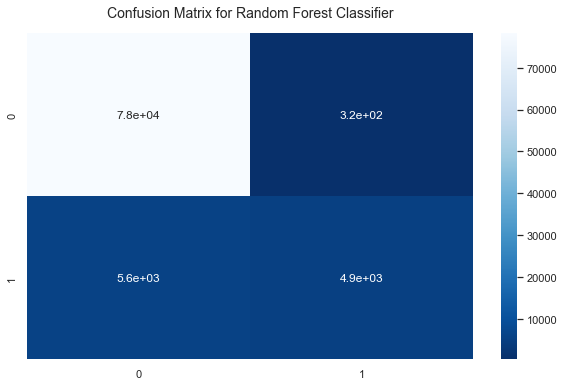

In [53]:
y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.set(rc={"figure.figsize":(10, 6)}) 
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")

plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, y=1.03)

In [52]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     78580
           1       0.94      0.47      0.62     10475

    accuracy                           0.93     89055
   macro avg       0.94      0.73      0.79     89055
weighted avg       0.93      0.93      0.92     89055

